In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

In [ ]:
boston = tf.keras.datasets.boston_housing

In [ ]:
dir(boston)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'load_data']

In [ ]:
boston_data = boston.load_data()

57026/57026 [==============================] - 0s 0us/step


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(path='boston_housing.npz', test_split=0.2, seed=42)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.reshape(-1, 1))

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(13), name='input-layer'),
    tf.keras.layers.Dense(100, name='hidden-layer-2'),
    tf.keras.layers.BatchNormalization(name='hidden-layer-3'),
    tf.keras.layers.Dense(50, name='hidden-layer-4'),
    tf.keras.layers.Dense(1, name='output-layer')
])

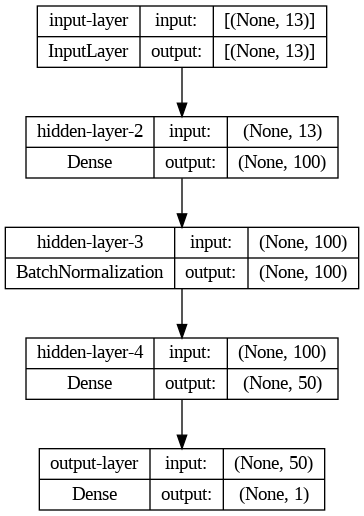

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden-layer-2 (Dense)      (None, 100)               1400      
                                                                 
 hidden-layer-3 (BatchNorma  (None, 100)               400       
 lization)                                                       
                                                                 
 hidden-layer-4 (Dense)      (None, 50)                5050      
                                                                 
 output-layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 6901 (26.96 KB)
Trainable params: 6701 (26.18 KB)
Non-trainable params: 200 (800.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [ ]:
history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
13/13 [==============================] - 1s 18ms/step - loss: 574.8789 - mae: 22.3634 - val_loss: 2224.5266 - val_mae: 44.4160
Epoch 2/20
13/13 [==============================] - 0s 7ms/step - loss: 550.9838 - mae: 22.0251 - val_loss: 705.3503 - val_mae: 24.4563
Epoch 3/20
13/13 [==============================] - 0s 7ms/step - loss: 530.6443 - mae: 21.6095 - val_loss: 1005.8787 - val_mae: 30.3659
Epoch 4/20
13/13 [==============================] - 0s 6ms/step - loss: 501.7632 - mae: 21.0424 - val_loss: 629.7626 - val_mae: 23.7866
Epoch 5/20
13/13 [==============================] - 0s 7ms/step - loss: 462.1404 - mae: 20.1391 - val_loss: 658.0805 - val_mae: 24.4096
Epoch 6/20
13/13 [==============================] - 0s 6ms/step - loss: 399.1111 - mae: 18.7222 - val_loss: 542.7188 - val_mae: 22.2311
Epoch 7/20
13/13 [==============================] - 0s 7ms/step - loss: 312.8028 - mae: 16.4244 - val_loss: 313.3749 - val_mae: 16.6600
Epoch 8/20
13/13 [===========================

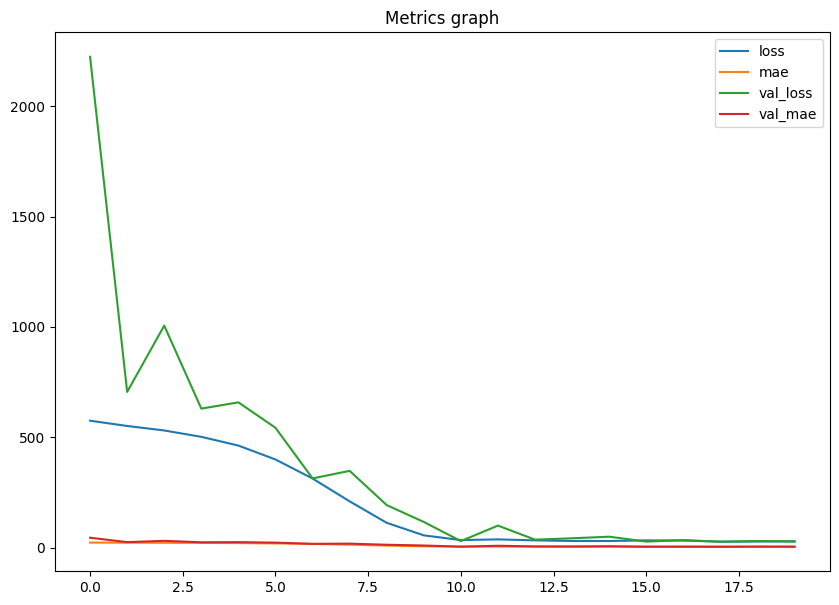

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics graph")
plt.show()

In [ ]:
y_pred = model.predict(x_test)

4/4 [==============================] - 0s 4ms/step


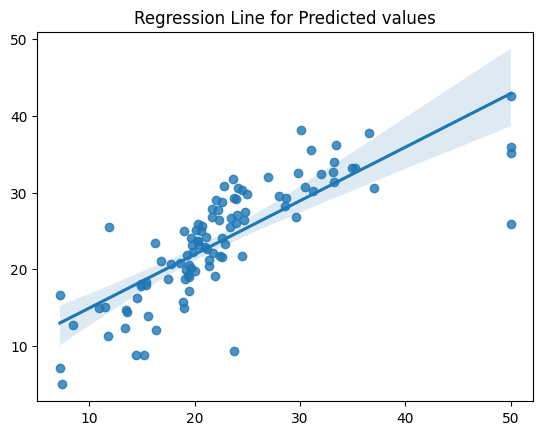

In [ ]:
sns.regplot(x=y_test, y=y_pred)
plt.title("Regression Line for Predicted values")
plt.show()

In [ ]:
def regression_metrics_display(y_test, y_pred):
  print(f"MAE is {metrics.mean_absolute_error(y_test, y_pred)}")
  print(f"MSE is {metrics.mean_squared_error(y_test,y_pred)}")
  print(f"R2 score is {metrics.r2_score(y_test, y_pred)}")

In [ ]:
regression_metrics_display(y_test, y_pred)

MAE is 3.7487237733953136
MSE is 27.631791791938596
R2 score is 0.6119240015553091
